# Import Modul dan Dataset

Import Modul

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Mengunduh dataset menggunakan kredensial kaggle

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 15.1MB/s]


Ekstrak Zip

In [ ]:
import zipfile, os
local_zip = '/content/insurance.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/insurance')
zip_ref.close()

Membaca Dataset dan cek dataset

In [ ]:
hospital = pd.read_csv('/content/insurance/insurance.csv')
hospital.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
hospital.shape

(1338, 7)

In [ ]:
hospital.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
hospital.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Bagi fitur menjadi kategorikal dan numerikal

In [ ]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children', 'charges']

# Univariate Analysis

Grafik fitur Sex

        jumlah sampel  persentase
male              676        50.5
female            662        49.5


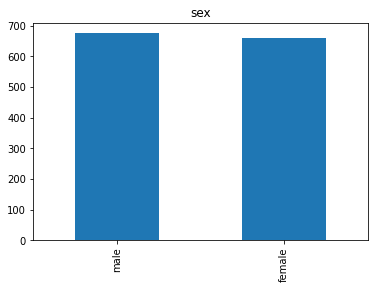

In [ ]:
feature = categorical_features[0]
count = hospital[feature].value_counts()
percent = 100 * hospital[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel' : count, 'persentase' : percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Grafik fitur Smoker

     jumlah sampel  persentase
no            1064        79.5
yes            274        20.5


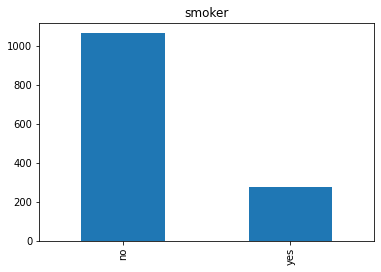

In [ ]:
feature = categorical_features[1]
count = hospital[feature].value_counts()
percent = 100 * hospital[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel' : count, 'persentase' : percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Grafik Fitur Region

           jumlah sampel  persentase
southeast            364        27.2
southwest            325        24.3
northwest            325        24.3
northeast            324        24.2


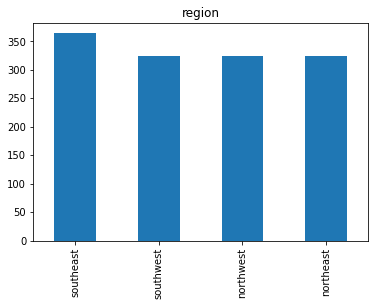

In [ ]:
feature = categorical_features[2]
count = hospital[feature].value_counts()
percent = 100 * hospital[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel' : count, 'persentase' : percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

# Multivariate Analysis

Kategorikal Fitur

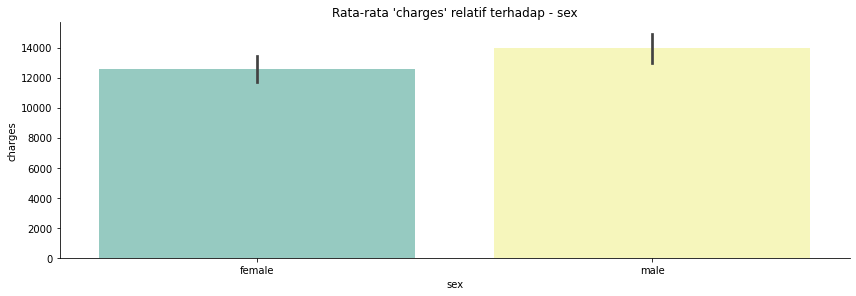

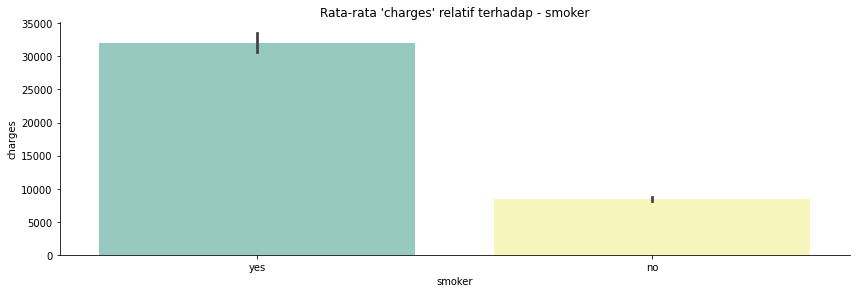

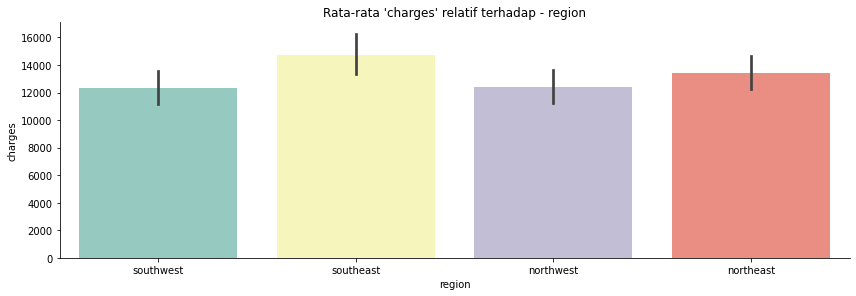

In [ ]:
cat_features = hospital.select_dtypes(include='object').columns.to_list()
for col in cat_features:
  sns.catplot(x=col, y='charges', kind='bar', dodge=False, height=4, aspect=3, data=hospital, palette='Set3')
  plt.title("Rata-rata 'charges' relatif terhadap - {}".format(col))

Numerikal Fitur

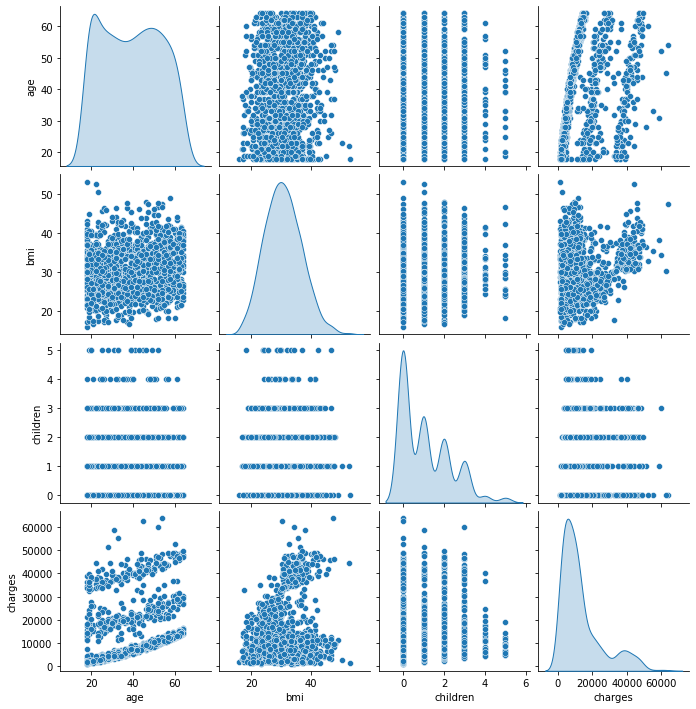

In [ ]:
sns.pairplot(hospital, diag_kind='kde')

Korelasi Matriks

Text(0.5, 1.0, 'Korelasi Matriks Fitur Numerikal')

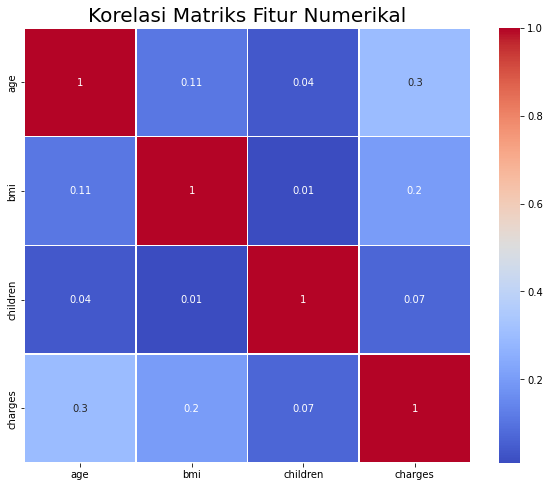

In [ ]:
plt.figure(figsize=(10, 8))
corr = hospital.corr().round(2)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Korelasi Matriks Fitur Numerikal", size=20)

Dari korelasi matriks di atas, target (charges) memiliki korelasi yang rendah terhadap fitur nmerikal

#  Encoding Fitur Kategori

In [ ]:
hospital = pd.concat([hospital, pd.get_dummies(hospital['sex'], prefix='sex')], axis=1)
hospital = pd.concat([hospital, pd.get_dummies(hospital['smoker'], prefix='smoker')], axis=1)
hospital = pd.concat([hospital, pd.get_dummies(hospital['region'], prefix='region')], axis=1)

Buat korelasi matriks terhadap semua fiturnya

Text(0.5, 1.0, 'Korelasi Matriks Seluruh Fitur')

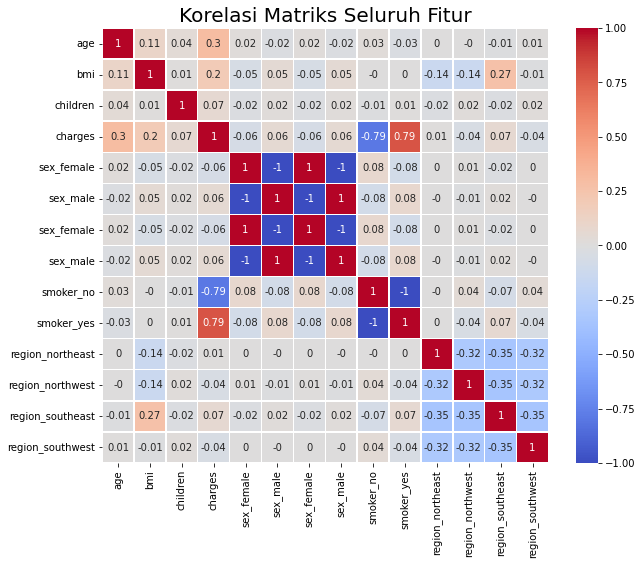

In [ ]:
plt.figure(figsize=(10, 8))
corr = hospital.corr().round(2)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Korelasi Matriks Seluruh Fitur", size=20)

Drop kolom yang telah di encoding

In [ ]:
hospital.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
hospital.head()

,age,bmi,children,charges,sex_female,sex_male,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,1,1,0,0,1,0,0


Buat dataframe X yang menampung fitur selain fitur target (Charges)

In [ ]:
X = hospital.drop(['charges'], axis=1)
X

,age,bmi,children,sex_female,sex_male,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,1,0,0,0,0,1


Jadikan dataframe X sebagai data test, lalu buang kolom region karena tidak diperlukan

In [ ]:
x_test = X.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)
x_test

,age,bmi,children,sex_female,sex_male,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,1,0,0,1
1,18,33.770,1,0,1,0,1,1,0
2,28,33.000,3,0,1,0,1,1,0
3,33,22.705,0,0,1,0,1,1,0
4,32,28.880,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,1,1,0
1334,18,31.920,0,1,0,1,0,1,0
1335,18,36.850,0,1,0,1,0,1,0
1336,21,25.800,0,1,0,1,0,1,0


Pisahkan fitur target (charges) menjadi y

In [ ]:
y = hospital['charges']

Bagi menjadi Data Train dan Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [ ]:
print(f'total # of sample in whole dataset: {len(X)}')
print(f'total # of sample in whole dataset: {len(X_train)}')
print(f'total # of sample in whole dataset: {len(X_test)}')

total # of sample in whole dataset: 1338
total # of sample in whole dataset: 1137
total # of sample in whole dataset: 201


Standarisasi menggunakan StandardScaler

In [ ]:
numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

In [ ]:
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

In [ ]:
X_train[numerical_features].describe().round(4)

,age,bmi,children
count,1137.0000,1137.0000,1137.0000
mean,-0.0000,0.0000,0.0000
std,1.0004,1.0004,1.0004
min,-1.5045,-2.4043,-0.9131
25%,-0.9355,-0.7284,-0.9131
50%,-0.0109,-0.0456,-0.0704
75%,0.8425,0.6731,0.7723
max,1.7670,3.6672,3.3004


Buat dataframe untuk menampung nilai MSE

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RF'])

Membuat model KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Membuat Model Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=100, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_jobs=-1, random_state=100)

In [ ]:
models.loc['train_mse','RF'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Tabel untuk menampung nilai MSE dari data train dan data test

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF'])
model_dict = {'KNN': knn, 'RF': RF}

Menghitung nilai MSE

In [ ]:
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

In [ ]:
mse

,train,test
KNN,23088.920074,30742.031936
RF,3477.096197,20097.680804


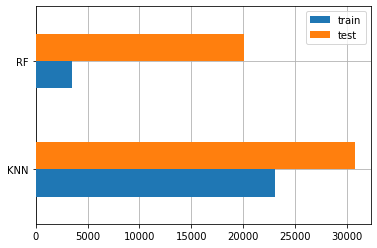

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Menghitung nilai R2 Score

In [ ]:
forest_test_pred = RF.predict(X_test)
knn_test_pred = knn.predict(X_test)

In [ ]:
print("R2 score random forest : ", r2_score(y_test, forest_test_pred))
print("R2 score KNN : ", r2_score(y_test, knn_test_pred))

R2 score random forest :  0.8591789375710261
R2 score KNN :  0.7845957630286245


In [ ]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF
12,1826.84300,5625.2,3768.1
306,20177.67113,5172.0,4647.3
318,7421.19455,6993.7,13380.3
815,1877.92940,3752.7,2453.6
157,15518.18025,20172.3,19410.4
